
# Altimetry data preparation

This notebooks downloads all altimetry CMEMS data for a given
product id. The data within a given bounding box is then loaded

Load all necessary modules

In [1]:
using CoastalCurrents
using CoastalCurrents: Altimetry
using ProgressMeter
using Test
using PyPlot
using DIVAnd
using Dates

Define common parameters, among others
the bounding box, the CMEMS product ID
CMEMS username, CMEMS password, ...
in a common file called `common.jl`:

In [2]:
include("common.jl")

The base URL

In [3]:
url = "ftp://my.cmems-du.eu/Core/" * product_id

"ftp://my.cmems-du.eu/Core/SEALEVEL_EUR_PHY_L3_MY_008_061"

Recursive download of all files under url
unless they are already present

In [4]:
fnames = Altimetry.download(url,altimetry_dir,username,password);

Uncomment the following lines to consider only the first 100 tracks as a test

In [5]:
#=
sel = 1:100
fnames = fnames[sel]
=#

Load the data in all files with the bounding box defined by `lonr` and `latr`

In [6]:
sla,slaf,mdt,lon,lat,time,id = Altimetry.load(fnames,lonr,latr,Altimetry.mission_ids);

[ Info: check complete files
Progress: 100%|█████████████████████████████████████████| Time: 0:02:02
[ Info: load files
Progress: 100%|█████████████████████████████████████████| Time: 0:03:36


Plot the first 30 tracks

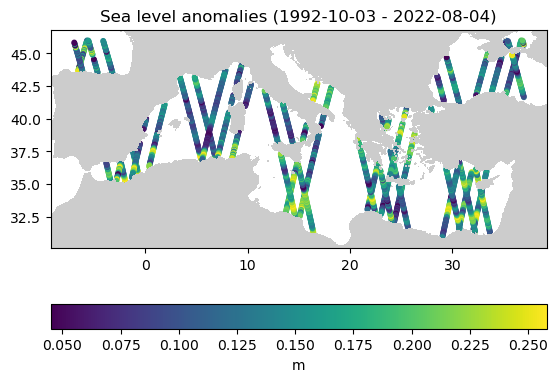

In [7]:
ntracks = 30
figure()
for id0 in unique(id)[1:ntracks]
    i = id0 .== id
    scatter(lon[i],lat[i],10,sla[i])
end
colorbar(orientation="horizontal",label="m")
CoastalCurrents.Plotting.plotmap(bathname)
title("Sea level anomalies ($(join(Dates.format.(extrema(time),"yyyy-mm-dd")," - ")))");

Save selection in the file `altimetry_fname`

In [8]:
Altimetry.save(altimetry_fname,lon,lat,time,sla,slaf,mdt,id)